# <div class="alert alert-warning" style="background-color: #f9d5f9; color: #89628a;"> <center><font color="magenta">**Modelo Baseline**</font></center>

<center>Autoras: Luiza Davoli, Samarah L. M. Ramos e Sarah S. Silva</center>



<center>˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .</center>

## <font color="magenta">**Introdução**</font>

O baseline é um modelo simples e básico usado como ponto de referência para comparar o desempenho de modelos mais complexos.

Ele serve para estabelecer um desempenho mínimo que modelos mais sofisticados devem superar, avaliar se esses modelos realmente valem a pena se seu modelo complexo não é muito melhor que o baseline, algo está errado

Nesse notebook, seguiremos os seguintes passos:
1. Criando o modelo
2. Visualização gráfica
3. Análise dos resultados
4. Salvando Resultados

<center>˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .</center>

## <font color="magenta">**1. Criando o modelo**</font>

O primeiro passo para a criação de um modelo baseline é importar as bibliotecas e os módulos que serão utilizados em sua implantação. Nesse caso, temos as seguintes:

- **Pandas**: O pandas fornece rapidamente estruturas de dados flexíveis e expressivas, projetadas para tornar o trabalho com dados mais fácil e intuitivo.

- **Scikit learn**: O scikit-learn é uma biblioteca de aprendizado de máquina que possui tanto a opção de realizar aprendizado supervisionado, quanto não supervisionado. Ele também fornece ferramentas para diversas necessidades que podem surgir em projetos desse tipo, como ajuste de modelo, pré-processamento de dados, seleção de modelo, avaliação de modelo e muitos outros.

- **NumPy**: O NumPy é um pacote fundamental para computação científica. Ele possui ferramentas para trabalhar com matrizes comuns, multidimensionais ou mascaradas, realizando operações rápidas incluindo matemática, lógica, manipulação de formas, classificação, seleção, transformadas discretas de Fourier, álgebra linear básica, operações estatísticas básicas, simulação aleatória e muito mais.

- **Seaborn**: O Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib. Ele fornece uma interface de alto nível para desenho gráficos estatísticos atraentes e informativos.


Depois disso, é necessário importar os dados que constrituirão o Data Frame utilizado. Para isso, podemos utilizar uma das funcionalidades da biblioteca Pandas, citada acima, a `read_csv`, já que os dados estão armazenados em um arquivo *.csv*.

In [1]:
# importando os módulos
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_squared_error
import numpy as np
import seaborn as sns

# importando os dados
df = pd.read_csv("dados_tratados.csv")

Agora, precisamos separar os tipos diferentes de dados. Isso porque as funções de regressão linear do SciKit não reconhecem dados categóricos, sendo necessário transformá-los em numéricos. 

Para isso, criamos diferentes variáveis que armazenem esses tipos de dados, até que haja a conversão (chamadas de `numericos` e `categoricos`). Para a conversão, foi utilizado o One-Hot Encoder, que é uma técnica usada para converter variáveis categóricas em colunas binárias para cada categoria, permitindo que os modelos de aprendizado de máquina interpretem dados categóricos sem assumir qualquer ordem ou hierarquia.

Depois da conversão, os dados já podem ser agrupados novamente (em uma variável que chamamos de `X`), usando a função`hstack`, a fim de realizarmos a previsão com o modelo.

O último passo antes de executar a previsão é separar os dados presentes no Data Set em treino e teste. Os dados de treino serão usados apenas para treinar o modelo e medir seu desempenho. Esses dados não serão utilizados como base para as predições. Já os dados de teste são os únicos utilizados na predição, a fim de ver se o modelo realmente entendeu os padrões gerais. Se essa divisão não for feita, se torna impossível saber se o modelo está realizando predições boas ou ruins, já que não existem dados externos para comparação e, no mundo real, queremos prever dados que nunca vimos antes.

In [2]:
# dados numéricos:
numericos = df[["Age", 
                "Avg_Daily_Usage_Hours", 
                "Sleep_Hours_Per_Night", 
                "Conflicts_Over_Social_Media", 
                "Addicted_Score"]].values

# dados categóricos:
categoricos = df[["Academic_Level",
                 "Country",
                  "Gender",
                 "Most_Used_Platform",
                 "Affects_Academic_Performance",
                 "Relationship_Status"]].values

# conversão OneHot para transformar os dados categóricos
encoder = OneHotEncoder(sparse_output=False)
categ_encoded = encoder.fit_transform(categoricos)

# agrupando novamente os diferentes tipos de variáveis
X = np.hstack([numericos, categ_encoded])

# definindo qual será o nosso target
y = df["Mental_Health_Score"].values

# separando os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# realizando a previsão com o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)
y_previsto = modelo.predict(X_teste)

<center>˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .</center>

## <font color="magenta">**2. Visualização Gráfica**</font>

Uma das principais formas de visualizar os resultados da previsão é plotando um gráfico que compara os valores reais do target e os valores obtidos com o modelo, chamados de *y verdadeiro* e *y previsto*, respectivamente.

Nesse gráfico, cada valor de *y verdadeiro* (localizado no eixo x) é comparado ao seu respectivo valor de *y previsto* (localizado no eixo y). A reta chamada *identidade* representa os dados previstos que são exatamente iguais aos dados verdadeiros. Quanto mais próximos os pontos se localizarem dessa reta, melhor é o modelo de previsão utiizado.

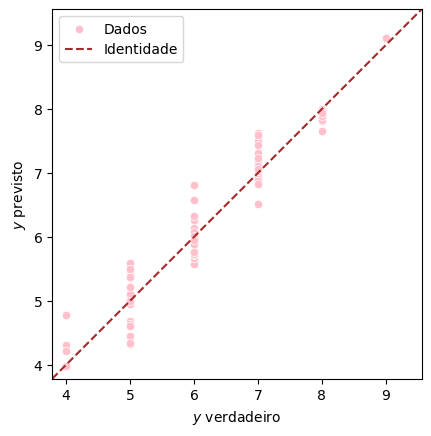

In [3]:
# definindo os valores máximos e mínimos dos eixos do gráfico
min_val = min(y_teste.min(), y_previsto.min())
max_val = max(y_teste.max(), y_previsto.max())
intervalo = [min_val * 0.95, max_val * 1.05]

# plotando o gráfico
eixo = sns.scatterplot(x=y_teste, y=y_previsto, label="Dados", color="pink")
eixo.plot(intervalo, intervalo, "--", label="Identidade", color="brown")
eixo.set(
    xlabel="$y$ verdadeiro",
    ylabel="$y$ previsto",
    xlim=intervalo,
    ylim=intervalo,
    aspect="equal",
)
eixo.legend();

Nesse caso, como os pontos se localizam ao redor da reta, é possível perceber que o modelo é coerente aos dados reais. Apesar disso, esses dados estão relativamente espalhados com relação ao eixo y, o que significa que a variação dos valores previstos será um pouco alta.

<center>˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .</center>

## <font color="magenta">**3. Análise dos Resultados**</font>

O MSE (Mean Squared Error ou Erro Quadrático Médio) é uma métrica fundamental usada para avaliar o desempenho de modelos de machine learning, especialmente em problemas de regressão. De forma simplificada, o MSE mede "quão longe" as previsões do modelo estão dos valores reais, fornecendo uma medida da qualidade das informações. 

A principal limitação dessa métrica é a questão das unidades difíceis de interpretar. Como ele trabalha com valores ao quadrado, as unidades podem ser confusas.

Já o RMSE (Root Mean Squared Error ou Raiz Quadrada da Média das Diferenças Quadráticas) é uma métrica amplamente usada que indica o grau de erro das previsões, em média. Ele é calculado a partir da raiz quadrada do MSE, o que o torna mais interpretável.

Um RMSE menor indica que os erros de previsão são menores, ou seja, as previsões são mais precisas. Não há um valor absoluto que indica se o valor do RMSE será bom ou não. Essa conclusão deve ser tirada a partir de comparações entre diferentes modelos usados para previsões com os mesmos dados.

In [5]:
rmse = root_mean_squared_error(y_teste, y_previsto)
mse = mean_squared_error(y_teste, y_previsto)

print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")

RMSE: 0.2609
MSE: 0.0681


Além da eficiência do modelo, é importante checar se há ou não há vazamento dos dados entre treino e teste. Se existem dados iguais (redundantes) em conjuntos diferentes, dizemos que houve vazamento, já que o modelo não está sendo testado com dados 100% novos.

Podemos verificar se houve vazamento da seguinte forma:

In [ ]:
# verificação de vazamento dos dados
# tamanho do dataset:
T_df = len(df)

# tamanho do treino:
T_treino = len(X_treino)

# tamanho do teste:
T_teste = len(X_teste)

# condição de vazamento: T_teste+T_treino != T_df

if T_teste + T_treino == T_df:
    print("Não houve vazamento de dados, pois a soma dos dados de treino e teste possui o mesmo tamanho do dataset")

else:
    print("Houve vazamento de dados")

<center>˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .</center>

## <font color="magenta">**4. Salvando Resultados**</font>

A fim de combinar os resultados das métricas obtidas em um único notebook, é necessário criar um arquivo que armazene todas essas informações. 

Nesse caso, o formato utilizado será o JSON (JavaScript Object Notation), que é um formato leve de troca de dados. As vantagens de usar esse formato envolvem sua facilidade de interpretação, tanto para humanos, quanto para máquinas, sua universalidade, já que funciona com qualquer linguagem de programação e sua capacidade de ser aberto em qualquer editor.

In [11]:
import json
from datetime import datetime
import os

# Se o arquivo já existe, carregar. Se não, criar novo.
if os.path.exists('model_metrics.json'):
    with open('model_metrics.json', 'r') as f:
        all_models = json.load(f)
else:
    all_models = {}

# Adicionar novo modelo (LASSO)
all_models['baseline'] = {
    'model_name': 'baseline',
    'mse': float(mse),
    'rmse': float(rmse),
    'timestamp': datetime.now().isoformat(),
    'dataset': 'dados_tratados',
    'target_variable': 'Mental_Health_Score'
}

# Salvar atualizado
with open('model_metrics.json', 'w') as f:
    json.dump(all_models, f, indent=4)


<center>˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .</center>

## <font color="magenta">**Referências**</font>

NUMPY. **Overview — NumPy v1.19 Manual**. Disponível em: <https://numpy.org/doc/stable/>.

SCIKIT-LEARN. **User guide: contents — scikit-learn 0.22.1 documentation.** Disponível em: <https://scikit-learn.org/stable/user_guide.html>.

THE PANDAS DEVELOPMENT TEAM. **Package overview — pandas 1.1.5 documentation.** Disponível em: <https://pandas.pydata.org/docs/getting_started/overview.html>.

‌SEABORN. **seaborn: statistical data visualization — seaborn 0.9.0 documentation.** Disponível em: <https://seaborn.pydata.org/>.
‌
JSON.ORG. **JSON**. Disponível em: <https://www.json.org/json-en.html>.‌

<center>˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .˚ · • . ° .</center>